In [ ]:
import pandas as pd 
import numpy as np 
import csv
import matplotlib.pyplot as plt 
import seaborn as sns   #Python data visualization library based on matplotlib
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv,lstsq
from numpy import dot, transpose

In [ ]:
youtube_data = pd.read_csv('/content/youtube.csv')

In [ ]:
youdata = youtube_data.copy()
youdata.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [ ]:
youdata.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [ ]:
youdata.describe()

,category_id,views,likes,dislikes,comment_count
count,4158.000000,4.158000e+03,4.158000e+03,4158.000000,4158.000000
mean,20.784993,1.163445e+06,4.359380e+04,2109.932179,5395.324675
std,6.889935,3.567220e+06,1.509117e+05,15941.992331,21489.359003
min,1.000000,1.141000e+03,0.000000e+00,0.000000,0.000000
25%,20.000000,1.454280e+05,1.917000e+03,93.250000,405.000000
50%,24.000000,3.642015e+05,8.903000e+03,281.500000,1289.000000
75%,24.000000,9.918082e+05,2.932300e+04,952.000000,3740.500000
max,43.000000,8.036046e+07,2.542863e+06,504340.000000,519092.000000


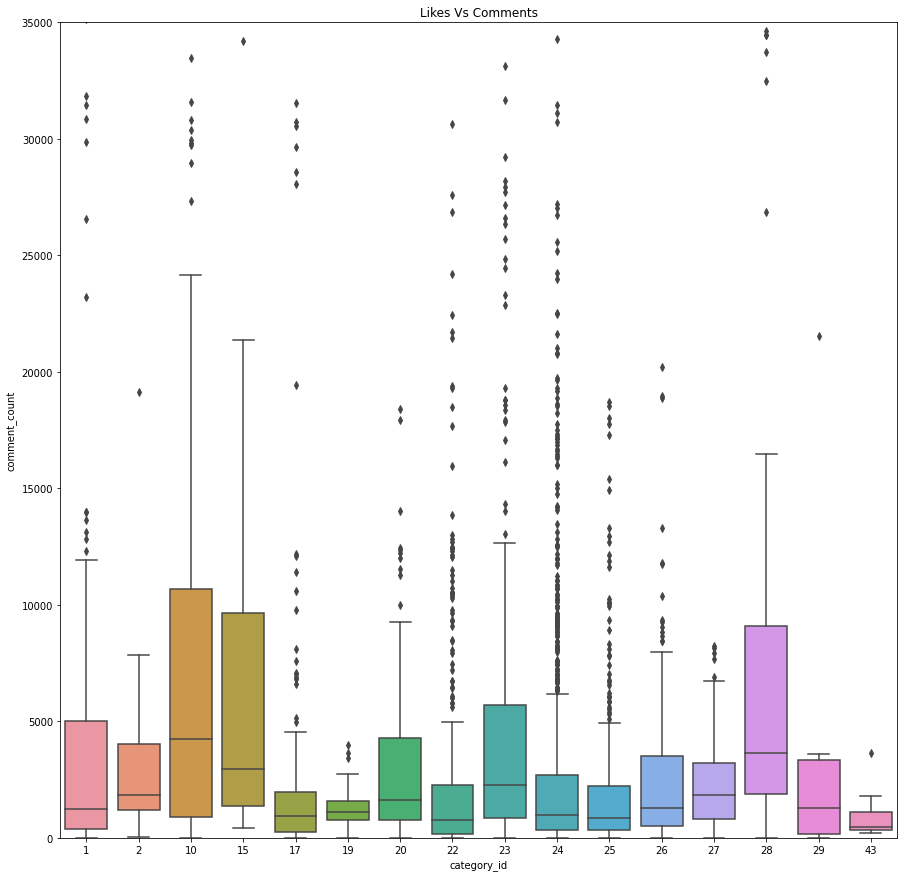

In [ ]:
plt.figure(figsize=(15,15))
sns.boxplot(x='category_id', y='comment_count',data=youdata)
plt.title('Likes Vs Comments')
plt.ylim(0, 35000)
plt.show()

Linear Regression

Predicted price =  [[1183.89519802]]


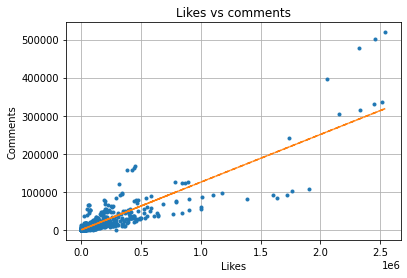

In [ ]:
x = youdata.likes
x = [[i] for i in list(x)]
y = youdata.comment_count
y = [[i] for i in list(y)]
model = LinearRegression()
model.fit(x,y)
plt.figure()
plt.title('Likes vs comments')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.plot(x,y,'.')
plt.plot(x,model.predict(x),'--')
plt.grid(True)
print ("Predicted price = ",model.predict([[10000]])) 
plt.show()

Multiple Regression

In [ ]:
x = youdata[['likes', 'dislikes']]
y = youdata['comment_count']

regr = LinearRegression()
regr.fit(x, y)

predictedVal = regr.predict([[2300, 130]])
print(predictedVal)
# print(regr.coef_)
print ("values of β1, β2: ",lstsq(x, y, rcond=None)[0])

[73.75618563]
values of β1, β2:  [0.11747116 0.22919879]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
